# PCA analysis

## Import libraries

In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import math
import random
import numpy as np

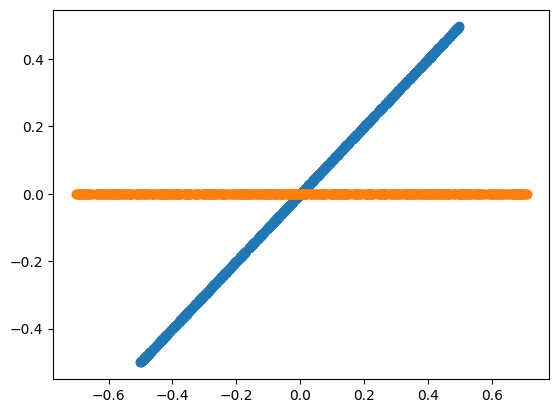

In [3]:
np.random.seed(1)

n = 1

x = np.random.uniform(1, 2, 1000)
y = x.copy() * n

# Center data - PCA works better this way
x = x - np.mean(x)  # Center x -> Remove its mean
y = y - np.mean(y)  # Center y -> Remove its mean

data = pd.DataFrame({"x": x, "y": y})
plt.scatter(data.x, data.y)

pca = PCA(n_components=2)
pcaTr = pca.fit(data)
# Create the transformation model for this data. Internally, it gets the rotation
# matrix and the explained variance
pcaTr = pca.fit(data)

# Transform the data base on the rotation matrix of pcaTr
# # Create a data frame with the new variables. We call these new variables PC1 and PC2
rotatedData = pcaTr.transform(data)

dataPCA = pd.DataFrame(data=rotatedData, columns=["PC1", "PC2"])

plt.scatter(dataPCA.PC1, dataPCA.PC2)

plt.show()

## Understanding the transformation model pcaTr

As mentioned before, a PCA model is composed of a rotation matrix and its corresponding explained variance. In the next module, we will explain the details of the rotation matrices. 

* `pcaTr.components_` has the rotation matrix 
* `pcaTr.explained_variance_` has the explained variance of each principal component

In [4]:
print("Eigenvectors or principal component: First tow must be in the direction [1, n]")
pca = PCA(n_components=2)
pcaTr = pca.fit(data)
print(pcaTr.components_)

print()

print("Eigenvalues or explained variance")
print(pcaTr.explained_variance_)

Eigenvectors or principal component: First tow must be in the direction [1, n]
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]

Eigenvalues or explained variance
[1.66465230e-01 2.08930963e-34]


## Variance of the First Principal Component (PC1)

Given two random variables $x$ and $y$ that are perfectly correlated with $y = x$, and both follow a uniform distribution $U(1, 2)$, we explore the derivation of the variance of the first principal component (PC1) obtained through Principal Component Analysis (PCA).

### Background

For a uniform distribution $U(a, b)$, the variance is given by:

$$
Var(x) = \frac{(b - a)^2}{12}
$$

Given that both $x$ and $y$ are distributed as $U(1, 2)$, their variances are:

$$
Var(x) = Var(y) = \frac{1}{12}
$$

### PCA and PC1

PCA seeks to find new axes (principal components) that maximize the variance of the dataset when projected onto these axes. The coefficients of the first principal component (PC1) represent the direction in the feature space that captures the most variance.

Given the principal component vector for PC1 as $[-0.70710678, -0.70710678]$, it implies that both $x$ and $y$ contribute equally to PC1.

### Variance of PC1

The variance of PC1 when projecting $x$ and $y$ onto this new axis is calculated using the formula for the variance of a linear combination of random variables, accounting for their covariance:

$$
Var(PC1) = a^2 \cdot Var(x) + b^2 \cdot Var(y) + 2 \cdot a \cdot b \cdot Cov(x, y)
$$

Given the perfect correlation between $x$ and $y$, the covariance $Cov(x, y) = Var(x) = \frac{1}{12}$. The coefficients $a$ and $b$ for projecting onto PC1 are both $\frac{-1}{\sqrt{2}}$, reflecting the equal contribution and orientation of $x$ and $y$ with respect to PC1.

Substituting the values into the formula yields:

$$
Var(PC1) = \left(\frac{1}{\sqrt{2}}\right)^2 \cdot \frac{1}{12} + \left(\frac{1}{\sqrt{2}}\right)^2 \cdot \frac{1}{12} + 2 \cdot \left(\frac{1}{\sqrt{2}}\right) \cdot \left(\frac{1}{\sqrt{2}}\right) \cdot \frac{1}{12}
$$

This simplifies to:

$$
Var(PC1) = \frac{1}{12} + \frac{1}{12} + \frac{1}{6} = \frac{1}{6}
$$

### Conclusion

The total variance captured by PC1 is $\frac{1}{6}$, demonstrating that PC1 effectively combines the variances of $x$ and $y$, along with their covariance, in the direction that maximizes the variance captured by the data projection onto PC1.

## Derivation of Variance for PC2

Given the perfect correlation between $x$ and $y$, where $y = x$, both uniformly distributed as $U(1, 2)$, the variance of the second principal component (PC2) is derived as follows:

- The variance of both $x$ and $y$ is $Var(x) = Var(y) = \frac{1}{12}$.
- PC2, orthogonal to PC1, has coefficients $a = \frac{1}{\sqrt{2}}$ for $x$ and $b = \frac{-1}{\sqrt{2}}$ for $y$, with the covariance between $x$ and $y$, $Cov(x, y) = Var(x) = \frac{1}{12}$.

The variance of PC2 is calculated by:

$$
Var(PC2) = \left(\frac{1}{\sqrt{2}}\right)^2 \cdot Var(x) + \left(\frac{-1}{\sqrt{2}}\right)^2 \cdot Var(y) + 2 \cdot \left(\frac{1}{\sqrt{2}}\right) \cdot \left(\frac{-1}{\sqrt{2}}\right) \cdot Cov(x, y)
$$

Substituting values:

$$
Var(PC2) = \frac{1}{12} + \frac{1}{12} - \frac{1}{6} = 0
$$

Therefore, $Var(PC2) = 0$, indicating that PC2, being orthogonal to PC1 in this scenario, captures no additional variance.

The relationship between the covariance and correlation of two random variables, \(x\) and \(y\), is given by:

$$
\rho_{x,y} = \frac{\text{Cov}(x, y)}{\sigma_x \sigma_y}
$$

where:
- $\rho_{x,y}$ is the correlation coefficient between \(x\) and \(y\),
- $\text{Cov}(x, y)$ is the covariance between \(x\) and \(y\),
- $\sigma_x$ and $\sigma_y$ are the standard deviations of \(x\) and \(y\), respectively.

The correlation coefficient, $\rho_{x,y}$, measures the strength and direction of a linear relationship between two variables, normalized to the range \([-1, 1]\). Covariance measures the direction of the relationship and its magnitude but is not normalized, making it dependent on the scale of the variables. Correlation, by normalizing covariance with the product of the standard deviations of the variables, provides a scale-independent measure of the relationship's strength and direction.


## Clarifications of covariance

Given $y = x$ and $x$ is uniformly distributed as $U(1,2)$, we explore the relationship between covariance, variance, and correlation in this specific case.

### Definitions:

- The covariance between two variables $x$ and $y$, $Cov(x, y)$, measures how much the two variables change together.
- The variance of $x$, $Var(x)$, measures how much $x$ varies from its mean.
- The correlation coefficient between $x$ and $y$, $\rho_{x,y}$, measures the strength and direction of their linear relationship, normalized to the range $[-1, 1]$.

### Given Relationship:

Since $y = x$, we have a perfect linear relationship with no deviation, implying $\rho_{x,y} = 1$. The covariance $Cov(x, y)$ when $y = x$ is equivalent to $Cov(x, x)$, which is the variance of $x$, $Var(x)$.

### Covariance in Terms of Correlation:

The formula for covariance between $x$ and $y$ in terms of correlation is:

$$
Cov(x, y) = \rho_{x,y} \cdot \sigma_x \cdot \sigma_y
$$

For $y = x$:

- $\rho_{x,y} = 1$ because the correlation is perfect.
- $\sigma_x = \sigma_y$ because the standard deviations are equal (since $y = x$).

Thus, for $y = x$:

$$
Cov(x, y) = Cov(x, x) = 1 \cdot \sigma_x^2 = Var(x)
$$

### Variance of $x$ Distributed as $U(1,2)$:

The variance of $x$ is calculated as:

$$
Var(x) = \frac{(2-1)^2}{12} = \frac{1}{12}
$$

Therefore, in this case:

$$
Cov(x, y) = Cov(x, x) = Var(x) = \frac{1}{12}
$$

The covariance equals the variance of $x$ because $y = x$, making them perfectly correlated with a correlation coefficient of 1.


## Correlated normal random variables

Angle:  45.0
rotationMatrix
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
X.shape: (1000,)
Y.shape: (1000,)
xy.shape: (2, 1000)
xy.T.shape: (1000, 2)
rotationMatrix.shape: (2, 2)
data.shape: (1000, 2)


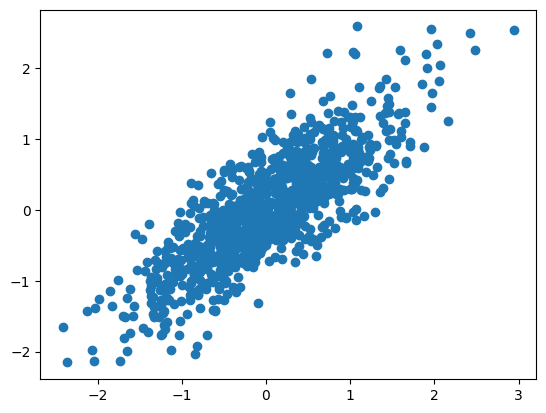

Correlation between X and Y (original data) that was rotated: 
[[1.         0.81678163]
 [0.81678163 1.        ]]


In [11]:
np.random.seed(100)

std1 = 1
std2 = 0.33

x = np.random.normal(0, std1, 1000)
y = np.random.normal(0, std2, 1000)

# Center data
x = x - np.mean(x)
y = y - np.mean(y)

# Define a pair of dependent variables with a desired amount of covariance
n = 1
angle = np.arctan(1 / n)
print("Angle: ", angle * 180 / math.pi)

# Create a rotation matrix using the given angle
rotationMatrix = np.array(
    [[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]
)

print("rotationMatrix")
print(rotationMatrix)

print(f"X.shape: {x.shape}")
print(f"Y.shape: {y.shape}")

xy = np.concatenate(([x], [y]), axis=0)

print(f"xy.shape: {xy.shape}")

xy = xy.T

print(f"xy.T.shape: {xy.shape}")
print(f"rotationMatrix.shape: {rotationMatrix.shape}")

data = xy @ rotationMatrix

print(f"data.shape: {data.shape}")

plt.scatter(data[:, 0], data[:, 1])
plt.show()

print(
    f"Correlation between X and Y (original data) that was rotated: \n{np.corrcoef(data[:,0], data[:, 1])}"
)

## Alternate calculation

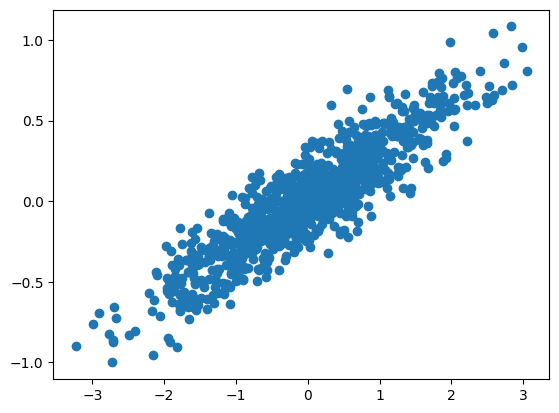

In [6]:
std1_alt = 1  # Standard deviation for x
std2_alt = 0.33  # Standard deviation for y

# Assuming you want a specific correlation, say 0.8
rho_alt = 0.9

# Construct the covariance matrix
covariance_matrix = [
    [std1_alt**2, rho_alt * std1_alt * std2_alt],
    [rho_alt * std1_alt * std2_alt, std2_alt**2],
]

# Generate the samples directly in their correlated form
data_alt = np.random.multivariate_normal([0, 0], covariance_matrix, size=1000)

# Plot the generated data
plt.scatter(data_alt[:, 0], data_alt[:, 1])
plt.show()

To create two normally distributed variables, $X$ and $Y$, that are correlated according to a specified covariance matrix, you can follow these steps:

1. **Start with two independent standard normal variables**, $Z_1$ and $Z_2$, which have a mean of 0 and a variance of 1.

2. **Define your target covariance matrix** for $X$ and $Y$. The covariance matrix is given by:

$$
\Sigma = \begin{bmatrix}
Var(X) & Cov(X, Y) \\
Cov(X, Y) & Var(Y)
\end{bmatrix}
$$

Where $Var(X)$ and $Var(Y)$ are the variances of $X$ and $Y$, respectively, and $Cov(X, Y)$ is their covariance.

3. **Cholesky decomposition**: To correlate $Z_1$ and $Z_2$ according to $\Sigma$, perform a Cholesky decomposition on $\Sigma$. The Cholesky decomposition of $\Sigma$ is a matrix $L$ such that:

$$
\Sigma = L L^T
$$

Where $L$ is a lower triangular matrix. For a 2x2 covariance matrix, $L$ can be calculated as:

$$
L = \begin{bmatrix}
\sqrt{Var(X)} & 0 \\
\frac{Cov(X, Y)}{\sqrt{Var(X)}} & \sqrt{Var(Y) - \frac{Cov(X, Y)^2}{Var(X)}}
\end{bmatrix}
$$

4. **Create correlated variables**: Use $L$ to transform the vector of independent standard normals $[Z_1, Z_2]^T$ into correlated variables:

$$
\begin{bmatrix}
X \\
Y
\end{bmatrix}
= L
\begin{bmatrix}
Z_1 \\
Z_2
\end{bmatrix}
$$

Thus, the correlated variables $X$ and $Y$ can be expressed as:

$$
X = \sqrt{Var(X)} \cdot Z_1
$$

$$
Y = \frac{Cov(X, Y)}{\sqrt{Var(X)}} \cdot Z_1 + \sqrt{Var(Y) - \frac{Cov(X, Y)^2}{Var(X)}} \cdot Z_2
$$

This method ensures that the resulting variables $X$ and $Y$ have the desired covariance structure specified by $\Sigma$.


## Another method using copolas

Copulas are a statistical tool used for modeling and simulating correlated random variables. They enable the specification of marginal distributions and their dependence structure separately. 

### Steps for Using Copulas:
1. **Choose Marginal Distributions**: Select the distributions for each variable.
2. **Select a Copula**: Choose a copula (e.g., Gaussian, t, Clayton) that fits the desired dependence structure.
3. **Parameterize the Copula**: Define the parameters, including the dependence structure.
4. **Sample from the Copula**: Generate correlated uniform random variables.
5. **Transform to Target Marginals**: Use inverse CDFs of the target distributions to transform the samples.

### Example with Gaussian Copula:
To generate two correlated normal variables:
1. Choose normal distributions as marginals.
2. Use a Gaussian copula to model the dependence.
3. Parameterize the copula with the desired correlation matrix.
4. Generate samples from the copula.
5. Transform these samples using the inverse CDFs of the normal distributions to achieve correlated normally distributed variables.


Copulas are mathematical functions used to describe the dependence between random variables, separate from their marginal distributions. A common use of copulas is to simulate correlated random variables when their individual distributions are known. Here, we'll focus on the Gaussian copula, which can be used to generate two correlated variables with normal distributions.

### Gaussian Copula

1. **Define the Correlation Matrix**: The first step is to specify the desired correlation between the variables. For two variables, this is a 2x2 matrix:

$$
R = \begin{bmatrix}
1 & \rho \\
\rho & 1
\end{bmatrix}
$$

where $\rho$ is the correlation coefficient between the two variables.

2. **Simulate Independent Standard Normals**: Generate two independent standard normally distributed random variables, $Z_1$ and $Z_2$.

3. **Apply the Cholesky Decomposition**: Perform the Cholesky decomposition on the correlation matrix $R$ to obtain matrix $L$, such that $R = LL^T$. 

$$
L = \text{cholesky}(R)
$$

4. **Transform the Independent Normals**: Use $L$ to transform the independent normals into correlated standard normals, $U = LZ$, where $Z$ is the vector of independent normals $[Z_1, Z_2]^T$, and $U$ is the vector of correlated normals.

5. **Convert to Uniform**: Transform these correlated standard normals into uniformly distributed variables using the cumulative distribution function (CDF) of the standard normal distribution, $\Phi$:

$$
U_i = \Phi(Z_i)
$$

for $i=1,2$. Now, $U_1$ and $U_2$ are uniformly distributed variables with the desired correlation structure.

6. **Transform to Target Marginals**: Finally, transform $U_1$ and $U_2$ to the target normal distributions using the inverse CDF (quantile function) of the desired normal distributions. If you want variables $X$ and $Y$ with means $\mu_X$, $\mu_Y$ and standard deviations $\sigma_X$, $\sigma_Y$, then:

$$
X = \mu_X + \sigma_X \Phi^{-1}(U_1)
$$

$$
Y = \mu_Y + \sigma_Y \Phi^{-1}(U_2)
$$

This process uses the Gaussian copula to create two correlated variables with specified normal distributions, leveraging the copula's ability to model dependence structures separately from the marginal distributions of the variables.


## Copula method

```python
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

np.random.seed(42)  # For reproducibility

# Define the desired correlation matrix for the copula
rho = 0.5  # Example correlation coefficient
correlation_matrix = np.array([[1, rho], [rho, 1]])

# Perform Cholesky decomposition to get the lower triangular matrix
L = np.linalg.cholesky(correlation_matrix)

# Generate independent standard normal samples
n_samples = 1000
Z = np.random.normal(0, 1, (n_samples, 2))

# Apply the lower triangular matrix L to introduce correlation
correlated_normals = Z.dot(L.T)

# Convert correlated standard normals to uniform using the CDF of the standard normal distribution
uniforms = norm.cdf(correlated_normals)

# Transform uniforms to desired marginals, for this example, we'll use normal distributions with different means and std devs
mean_x, std_dev_x = 0, 1  # Target marginals for X
mean_y, std_dev_y = 5, 2  # Target marginals for Y

X = norm.ppf(uniforms[:, 0], loc=mean_x, scale=std_dev_x)
Y = norm.ppf(uniforms[:, 1], loc=mean_y, scale=std_dev_y)

# Plot the results to visualize the correlation
plt.scatter(X, Y, alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Correlated Variables from a Gaussian Copula')
plt.grid(True)
plt.axis('equal')
plt.show()
```

## Back to previous example

Let us print the original and the resulting transformed system using the result of the PCA in the same plot alongside with the 2 Principal Component vectors in red and blue

angle:  45.0
Eigenvectors or principal component: First row must be in the direction of [1, n]
[[ 0.70826362  0.70594805]
 [-0.70594805  0.70826362]]

Eigenvalues or explained variance
[1.09488451 0.11041569]


/var/folders/rj/bvrtrtcd4qxgkzx7v4rk09m40000gn/T/ipykernel_89361/1866407887.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(
/var/folders/rj/bvrtrtcd4qxgkzx7v4rk09m40000gn/T/ipykernel_89361/1866407887.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(


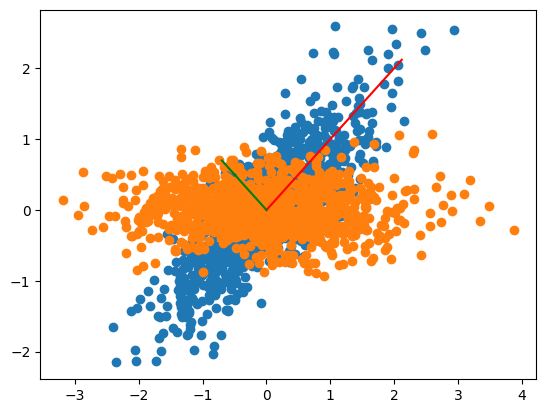

In [7]:
# Define a pair of dependent variables with a desired amount of covariance
n = 1  # Magnitude of covariance.
angle = np.arctan(1 / n)  # Convert the covariance to and angle
print("angle: ", angle * 180 / math.pi)

# Create a rotation matrix using the given angle
rotationMatrix = np.array(
    [[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]
)

plt.scatter(data[:, 0], data[:, 1])  # Print the original data in blue

# Apply PCA. In theory, the Eigenvector matrix must be the
# inverse of the original rotationMatrix.
pca = PCA(n_components=2)  # Instantiate a PCA. Choose to get 2 output variables

# Create the transformation model for this data. Internally it gets the rotation
# matrix and the explained variance
pcaTr = pca.fit(data)

# Create an array with the transformed data
dataPCA = pcaTr.transform(data)

print(
    "Eigenvectors or principal component: First row must be in the direction of [1, n]"
)
print(pcaTr.components_)

print()
print("Eigenvalues or explained variance")
print(pcaTr.explained_variance_)

# Print the rotated data
plt.scatter(dataPCA[:, 0], dataPCA[:, 1])

# Plot the first component axe. Use the explained variance to scale the vector
plt.plot(
    [0, rotationMatrix[0][0] * std1 * 3],
    [0, rotationMatrix[0][1] * std1 * 3],
    "k-",
    color="red",
)

# Plot the second component axe. Use the explained variance to scale the vector
plt.plot(
    [0, rotationMatrix[1][0] * std2 * 3],
    [0, rotationMatrix[1][1] * std2 * 3],
    "k-",
    color="green",
)

plt.show()

The explanation of this chart is as follows:
* The rotation matrix used to create our correlated variables took the original uncorrelated variables `x` and `y` and transformed them into the blue points.
* The PCA transformation finds out the rotation matrix used to create our correlated variables (blue points). Using the PCA model to transform our data, puts back the variables as our original uncorrelated variables.
* The explained Variance of the PCA is 

$$[1.0094, 0.1125] $$

which is approximately

$$[1, 0.333 * 0.333] = [std1^2, std2^2],$$

the parameters of our original random variables x and y

You can use the previous code to try with other standard deviations and correlations and convince yourself of this fact.   

In [10]:
print(
    f"Correlation between X and Y (original data) that was rotated: \n{np.corrcoef(data[:,0], data[:, 1])}"
)

Correlation between X and Y (original data) that was rotated: 
[[1.         0.81678163]
 [0.81678163 1.        ]]


# Rotation

When you rotate a dataset comprising two normally distributed variables by 45 degrees, you're essentially applying a linear transformation that mixes the two variables. This can introduce a correlation between them, depending on the nature of the rotation and the original distributions of the variables. The resulting correlation from a 45-degree rotation to an initially uncorrelated set of variables can be understood through the properties of rotation matrices and their effect on the data's covariance structure.

### Understanding the Rotation
The rotation matrix for a 45-degree angle ($\theta = 45^\circ$ or $\theta = \frac{\pi}{4}$ radians) is:

$$
R(\theta) = \begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{bmatrix} = \begin{bmatrix}
\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}
\end{bmatrix}
$$

Given two independent standard normal variables, $X$ and $Y$, their covariance matrix before rotation is the identity matrix $I$ (since $Var(X) = Var(Y) = 1$ and $Cov(X,Y) = 0$):

$$
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
$$

### The Effect of Rotation on Covariance
Applying the rotation matrix to the data vectors $[X, Y]^T$ effectively transforms them into a new set of coordinates $[X', Y']^T$. The covariance matrix of the transformed data can be calculated using the transformation formula for covariance matrices under linear transformations:

$$
\Sigma' = R\Sigma R^T
$$

Substituting $\Sigma = I$ and the rotation matrix $R$ yields:

$$
\Sigma' = RIR^T = RR^T
$$

Because $R$ is a rotation matrix for 45 degrees, the multiplication $RR^T$ does not change the fact that the variances of $X'$ and $Y'$ remain 1 (rotation preserves distances), but it introduces a non-zero covariance between $X'$ and $Y'$, which corresponds to the off-diagonal elements of $\Sigma'$.

### Calculating the Resulting Correlation
The correlation between $X'$ and $Y'$ after rotation can be observed as non-zero and is determined by the nature of how the rotation mixes the components of $X$ and $Y$. In the specific output you've shown, the correlation coefficient of approximately 0.81678163 reflects this induced correlation due to the mixing effect of the 45-degree rotation on initially independent variables.

This specific value arises from the geometrical properties of the rotation and how it projects the variances and covariances in the new coordinate system. It effectively demonstrates how rotation in multidimensional space can introduce or alter correlations between variables, a principle utilized in PCA for dimensionality reduction and in financial models for portfolio optimization and risk management.



The number $0.8167...$ is indeed recognizable and relates to a common mathematical value. Specifically, it is very close to the square root of $\frac{2}{3}$, or in decimal form:

$$
\sqrt{\frac{2}{3}} \approx 0.816496580927726
$$

The similarity between $0.8167...$ and $\sqrt{\frac{2}{3}}$ is not coincidental in many mathematical contexts, especially those involving geometry or the normalization of vectors in Euclidean space. In the context of rotating a dataset by 45 degrees and observing the correlation between the resulting variables, this value can emerge from the transformation properties and how they relate to the dataset's variance and covariance.

However, to claim that $0.8167...$ exactly equals $\sqrt{\frac{2}{3}}$ in your specific scenario would require a direct mathematical derivation based on the properties of the transformation applied. The appearance of this value suggests a geometric or algebraic relationship brought about by the rotation and how it affects the statistical properties of the dataset.

In your scenario, the appearance of a value close to $\sqrt{\frac{2}{3}}$ as a correlation coefficient after rotating normally distributed variables might be influenced by the specific transformations and the standard deviations of the original variables. It's a good observation and highlights how underlying mathematical relationships can manifest in statistical properties.


## PCA as a strategy for dimensionality reduction

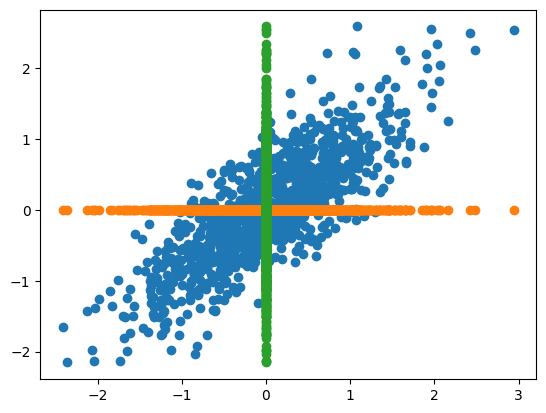

In [13]:
nPoints = len(data)

# Plot the original data in blue
plt.scatter(data[:, 0], data[:, 1])

# Plot the projection along the first component in orange
plt.scatter(data[:, 0], np.zeros(nPoints))

# Plot the projection along the second component in green
plt.scatter(np.zeros(nPoints), data[:, 1])

plt.show()

In [15]:
a = np.array([1, 0, -1])
b = np.array([2, 8, 1])

c = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
c

0.08512565307587484